# TSI Prediction: Batch Size Experiment (6 Hours Predictions)

In [1]:
#import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from scipy import stats

outputPath = 'C:\\Users\Ami\Dropbox\Tese\Monografia\Figuras\\'

## Varying Batch Size for 3 different sizes of Training Set

In [4]:
df1 = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\\6hoursExp_lstmBS_1TS.csv')
df2 = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\\6hoursExp_lstmBS_2TS.csv')
df3 = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\\6hoursExp_lstmBS_3TS.csv')

In [5]:
n_tests = 20 #number of tests for each setting
n_groups = int(df1.shape[0]/n_tests) #number of groups
intervals = range(0, n_groups*n_tests, n_tests) #index intervals for each group of values
groups = np.unique(df1[:,0].astype(np.int32))
lengths = [1320,2286,2624]
colors = ['orange', 'blue','green'] # boxplot's colors by type RNN
xLabel = 'Batch Size'
yLabel = 'Test Loss: Mean Squared Error (MSE)'
title = 'LSTM for TSI 6h Prediction: Batch Size Variation for three Training Set Sizes'

In [6]:
groups.shape[0]

6

In [7]:
percentages = np.zeros((len(lengths),groups.shape[0]))
for i in range(len(lengths)):
    for j in range(groups.shape[0]):
        percentages[i,j] = groups[j]/lengths[i]


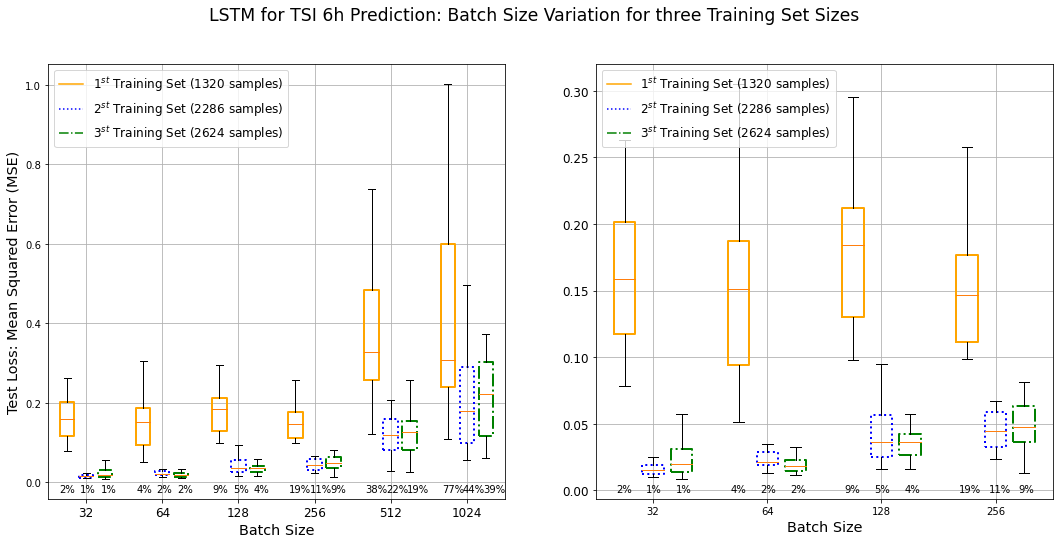

In [14]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(18, 8)) 
fig.suptitle(title,fontsize='xx-large')
ax1.tick_params(axis='x', labelsize='large' ) 
ax2.tick_params(axis='y', labelsize='large' ) 

a = 1 #first boxplot initial position
b = 2
c = 3

for i in range(n_groups):
    g1 = df1[intervals[i]:intervals[i]+n_tests, 3] #values for the i-th group 
    g2 = df2[intervals[i]:intervals[i]+n_tests, 3] #values for the i-th group 
    g3 = df3[intervals[i]:intervals[i]+n_tests, 3]
    boxes = ax1.boxplot([g1,g2,g3], widths=0.75, positions=[a,b,c], sym='') #, manage_ticks = True
    
    #change colors line boxplot by type RNN
    plt.setp(boxes['boxes'][0], color=colors[0], linewidth=2, linestyle='-')
    plt.setp(boxes['boxes'][1], color=colors[1], linewidth=2, linestyle=':')
    plt.setp(boxes['boxes'][2], color=colors[2], linewidth=2, linestyle='-.')
    
    # increment positions of plots
    a = c+2
    b = a+1
    c = b+1

ax1.plot([], c=colors[0], label=r'1$^{st}$ Training Set ('+str(lengths[0])+' samples)', linestyle='-')    
ax1.plot([], c=colors[1], label=r'2$^{st}$ Training Set ('+str(lengths[1])+' samples)', linestyle=':')
ax1.plot([], c=colors[2], label=r'3$^{st}$ Training Set ('+str(lengths[2])+' samples)', linestyle='-.')

ax1.legend(fontsize='large')
ax1.grid()

ax1.set_xticks(np.arange(2, n_groups*4, 4))# positioning xticks (first tick position,n_groups*total space for each group of ticks,total space for each group of ticks)
ax1.set_xticklabels(groups) 
ax1.set_xlim(0,n_groups*4)
ax1.set_xlabel(xLabel,fontsize='x-large')
ax1.set_ylabel(yLabel,fontsize='x-large')

x = 0.025
for j in range(percentages.shape[1]):
    for i in range(percentages.shape[0]):
        ax1.text(x, 0.015, str(int(percentages[i,j]*100))+'%', transform=ax1.transAxes, fontsize=10)
        x = x + 0.045
    x = x + 0.0325
    
    
a = 1 #first box initial position
b = 2
c = 3

for i in range(n_groups-2):
    g1 = df1[intervals[i]:intervals[i]+n_tests, 3] #values for the i-th group 
    g2 = df2[intervals[i]:intervals[i]+n_tests, 3] #values for the i-th group 
    g3 = df3[intervals[i]:intervals[i]+n_tests, 3]
    boxes = ax2.boxplot([g1,g2,g3], widths=0.75, positions=[a,b,c], sym='') #, manage_ticks = True
    
    #change colors line boxplot by type RNN
    plt.setp(boxes['boxes'][0], color=colors[0], linewidth=2, linestyle='-')
    plt.setp(boxes['boxes'][1], color=colors[1], linewidth=2, linestyle=':')
    plt.setp(boxes['boxes'][2], color=colors[2], linewidth=2, linestyle='-.')
    
    # increment positions of plots
    a = c+2
    b = a+1
    c = b+1

ax2.plot([], c=colors[0], label=r'1$^{st}$ Training Set ('+str(lengths[0])+' samples)', linestyle='-')    
ax2.plot([], c=colors[1], label=r'2$^{st}$ Training Set ('+str(lengths[1])+' samples)', linestyle=':')
ax2.plot([], c=colors[2], label=r'3$^{st}$ Training Set ('+str(lengths[2])+' samples)', linestyle='-.')

ax2.legend(fontsize='large',loc='upper left')
ax2.grid()

ax2.set_xticks(np.arange(2, (n_groups-2)*4, 4))# positioning xticks (first tick position,n_groups*total space for each group of ticks,total space for each group of ticks)
ax2.set_xticklabels(groups[:4]) 
ax2.set_xlim(0,(n_groups-2)*4)
ax2.set_xlabel(xLabel,fontsize='x-large')
# ax2.set_ylabel(yLabel,fontsize='x-large')
x = 0.045
for j in range(percentages.shape[1]-2):
    for i in range(percentages.shape[0]):
        ax2.text(x, 0.015, str(int(percentages[i,j]*100))+'%', transform=ax2.transAxes, fontsize=10)
        x = x + 0.065
    x = x + 0.055
    
plt.savefig(outputPath+'TSI6H_LSTM_BSTrainingSetSizes.pdf', dpi=200, format='pdf',bbox_inches='tight', transparent=False, 
            pad_inches=0.1)

## Varying Batch Size for 3 different sizes of Training Set with 200 Epochs

In [16]:
df1 = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\\Exp_gruBS200Epochs1Set.csv')
df2 = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\\Exp_gruBS200Epochs2Sets.csv')
df3 = np.loadtxt('C:\\Users\Ami\Documents\GitHub\Thesis\Traduzido\output_files\\Exp_gruBS200Epochs3Sets.csv')

In [17]:
n_tests = 20 #number of tests for each setting
n_groups = int(df1.shape[0]/n_tests) #number of groups
intervals = range(0, n_groups*n_tests, n_tests) #index intervals for each group of values
groups = np.unique(df1[:,0].astype(np.int32))
colors = ['orange', 'blue','green'] # boxplot's colors by type RNN
xLabel = 'Batch Size'
yLabel = 'Test Loss: Mean Squared Error (MSE)'
title = 'GRU for TSI 6h Prediction: Batch Size Variation for 3 Training Set Sizes with 200 Training Epochs'

In [18]:
lengths = [1320,2286,2624]
percentages = np.zeros((len(lengths),groups.shape[0]))
for i in range(len(lengths)):
    for j in range(groups.shape[0]):
        percentages[i,j] = groups[j]/lengths[i]

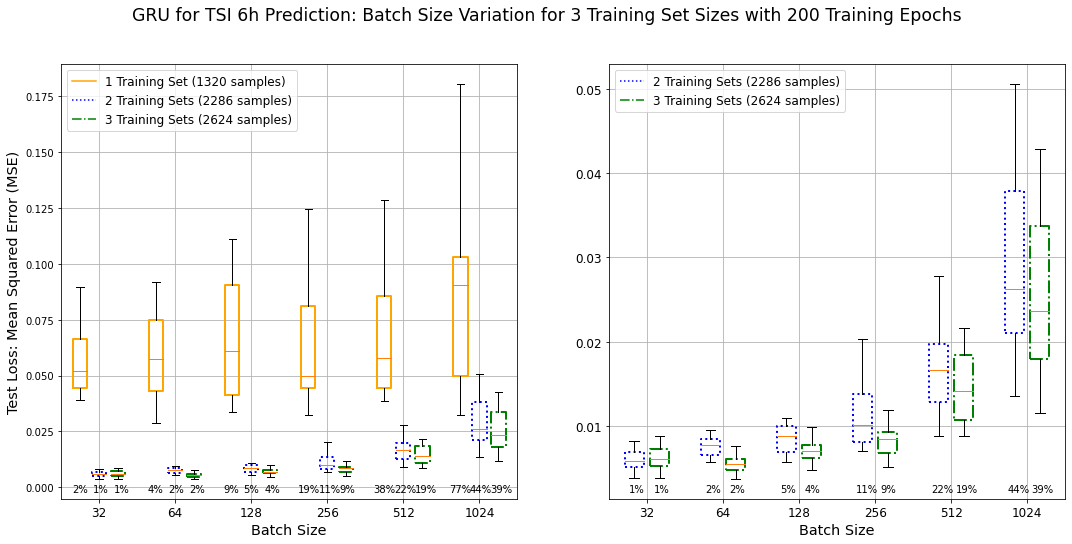

In [20]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(18, 8)) 
fig.suptitle(title,fontsize='xx-large')
ax1.tick_params(axis='x', labelsize='large' ) 
ax2.tick_params(axis='y', labelsize='large' ) 

a = 1 #first boxplot initial position
b = 2
c = 3

for i in range(n_groups):
    g1 = df1[intervals[i]:intervals[i]+n_tests, 3] #values for the i-th group 
    g2 = df2[intervals[i]:intervals[i]+n_tests, 3] #values for the i-th group 
    g3 = df3[intervals[i]:intervals[i]+n_tests, 3]
    boxes = ax1.boxplot([g1,g2,g3], widths=0.75, positions=[a,b,c], sym='') #, manage_ticks = True
    
    #change colors line boxplot by type RNN
    plt.setp(boxes['boxes'][0], color=colors[0], linewidth=2, linestyle='-')
    plt.setp(boxes['boxes'][1], color=colors[1], linewidth=2, linestyle=':')
    plt.setp(boxes['boxes'][2], color=colors[2], linewidth=2, linestyle='-.')
    
    # increment positions of plots
    a = c+2
    b = a+1
    c = b+1

ax1.plot([], c=colors[0], label='1 Training Set ('+str(lengths[0])+' samples)', linestyle='-')    
ax1.plot([], c=colors[1], label='2 Training Sets ('+str(lengths[1])+' samples)', linestyle=':')
ax1.plot([], c=colors[2], label='3 Training Sets ('+str(lengths[2])+' samples)', linestyle='-.')

ax1.legend(fontsize='large')
ax1.grid()

ax1.set_xticks(np.arange(2, n_groups*4, 4))# positioning xticks (first tick position,n_groups*total space for each group of ticks,total space for each group of ticks)
ax1.set_xticklabels(groups) 
ax1.set_xlim(0,n_groups*4)
ax1.set_xlabel(xLabel,fontsize='x-large')
ax1.set_ylabel(yLabel,fontsize='x-large')

x = 0.025
for j in range(percentages.shape[1]):
    for i in range(percentages.shape[0]):
        ax1.text(x, 0.015, str(int(percentages[i,j]*100))+'%', transform=ax1.transAxes, fontsize=10)
        x = x + 0.045
    x = x + 0.03

lengths2 = [2286,2624]
percentages2 = np.zeros((len(lengths2),groups.shape[0]))
for i in range(len(lengths2)):
    for j in range(groups.shape[0]):
        percentages2[i,j] = groups[j]/lengths2[i]

a = 1 #first boxplot initial position
b = 2

for i in range(n_groups):
    g2 = df2[intervals[i]:intervals[i]+n_tests, 3] #values for the i-th group 
    g3 = df3[intervals[i]:intervals[i]+n_tests, 3]
    boxes = ax2.boxplot([g2,g3], widths=0.75, positions=[a,b], sym='') #, manage_ticks = True
    
    #change colors line boxplot by type RNN
    plt.setp(boxes['boxes'][0], color=colors[1], linewidth=2, linestyle=':')
    plt.setp(boxes['boxes'][1], color=colors[2], linewidth=2, linestyle='-.')
#     plt.setp(boxes['boxes'][2], color=colors[2], linewidth=2, linestyle='-.')
    
    # increment positions of plots
    a = b+2
    b = a+1

# ax1.plot([], c=colors[0], label='1 Training Set ('+str(lengths[0])+' samples)', linestyle='-')    
ax2.plot([], c=colors[1], label='2 Training Sets ('+str(lengths2[0])+' samples)', linestyle=':')
ax2.plot([], c=colors[2], label='3 Training Sets ('+str(lengths2[1])+' samples)', linestyle='-.')

ax2.legend(fontsize='large')
ax2.grid()

ax2.set_xticks(np.arange(1.5, n_groups*3, 3))# positioning xticks (first tick position,n_groups*total space for each group of ticks,total space for each group of ticks)
ax2.set_xticklabels(groups,fontsize='large') 
ax2.set_xlim(0,n_groups*3)
ax2.set_xlabel(xLabel,fontsize='x-large')
# ax2.set_ylabel(yLabel,fontsize='x-large')

x = 0.045
for j in range(percentages2.shape[1]):
    for i in range(percentages2.shape[0]):
        ax2.text(x, 0.015, str(int(percentages2[i,j]*100))+'%', transform=ax2.transAxes, fontsize=10)
        x = x + 0.05275
    x = x + 0.06

plt.savefig(outputPath+'TSI6H_GRU_BSTrainingSetSizes200Epochs.pdf', dpi=70, format='pdf', bbox_inches='tight', transparent=False, 
            pad_inches=0.1)